# Time Series Forecasting: Predicting Stock Price
Time-Series Forecasting: Predicting Stock Prices Using Machine Learning Models This article was based on folow link
https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70

Saulo Accacio de Oliveira - saulo.accacio@gmail.com
Fell free to send me any improvements ;)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot3
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

<ipython-input-1-830c3a369e7a>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## About Dataset

This sample was created using **BTOW3.SA** stock price with 5 years of data downloaded from Yahoo Finance website.  
The following link show all data  
https://finance.yahoo.com/quote/BTOW3.SA/history?period1=1462579200&period2=1620345600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true



In [2]:
df = pd.read_csv("BTOW3.SA.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-09,11.680274,11.689927,10.521900,10.618431,10.618431,890074.0
1,2016-05-10,10.763228,11.062475,10.444675,10.570166,10.570166,930994.0
2,2016-05-11,10.763228,10.821147,10.435022,10.444675,10.444675,1180861.0
3,2016-05-12,10.570166,10.608778,9.884794,10.145428,10.145428,991182.0
4,2016-05-13,10.048897,10.058550,8.900176,9.131851,9.131851,1333972.0


In [8]:
df = df.dropna()
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Checking if there is some cross-correlation in out data.

Correlation check is important to choose right model to predict out target value

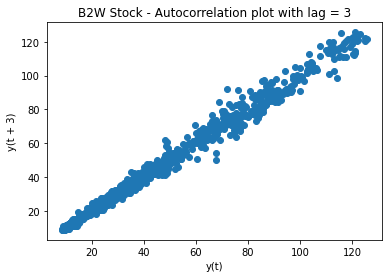

In [3]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('B2W Stock - Autocorrelation plot with lag = 3')
plt.show()

We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).
Finally, let’s plot the stock price evolution over time.

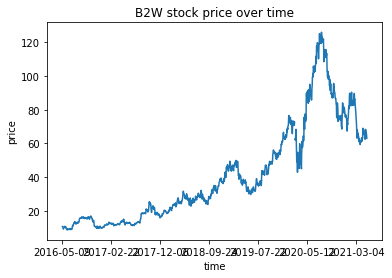

In [4]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("B2W stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

## Build the predictive ARIMA model
Next, let’s divide the data into a training (70 % ) and test (30%) set. For this tutorial we select the following ARIMA parameters: p=4, d=1 and q=0.

In [9]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

C:\Users\saccacio\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
Testing Mean Squared Error is 9.749657346217516


Summary of the code
We split the training dataset into train and test sets and we use the train set to fit the model, and generate a prediction for each element on the test set.
A rolling forecasting procedure is required given the dependence on observations in prior time steps for differencing and the AR model. To this end, we re-create the ARIMA model after each new observation is received.
Finally, we manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended at each iteration.


*The MSE of the test set is quite large denoting that the precise prediction is a hard problem. However, this is the average squared value across all the test set predictions. Let’s visualize the predictions to understand the performance of the model more.*


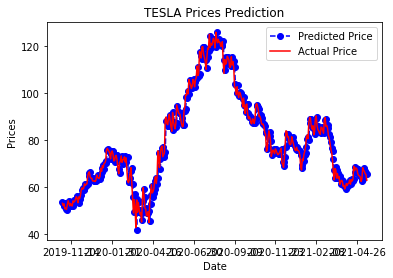

In [10]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('B2W Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()